In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set() 

import json
import requests

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df3 = pd.read_csv('./집계구별 일별시간대별 카드소비패턴.csv', encoding='CP949')

In [4]:
df3['기준일자(YMD)'] = df3['기준일자(YMD)'].astype(str)
df3['y'] = df3['기준일자(YMD)'].str[0:4]
df3['m'] =df3['기준일자(YMD)'].str[4:6]
df3['d'] =df3['기준일자(YMD)'].str[6:8]
df3.head()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),y,m,d
0,요식/유흥,20161004,6,1123076010009,104624,10,2016,10,04
1,유통,20210303,5,1122060030003,382592,20,2021,03,03
2,유통,20170606,6,1123066022301,341688,5,2017,06,06
3,스포츠/문화/레저,20171206,5,1124075020103,925118,5,2017,12,06
4,의료,20160909,6,1113075030002,217985,50,2016,09,09


In [5]:
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['가전/가구','가정생활/서비스'],'가정생활')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace('교육/학원','교육')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['스포츠/문화/레저','여행/교통'],'문화')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['주유','자동차'],'교통')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['요식/유흥','음/식료품'],'식품')
df3['업종대분류(UPJONG_CLASS1)'] = df3['업종대분류(UPJONG_CLASS1)'].replace(['의류/잡화','미용'],'패션')
df3['업종대분류(UPJONG_CLASS1)'].value_counts()

식품       97
유통       88
전자상거래    79
문화       59
교통       51
의료       43
가정생활     43
패션       27
교육       13
Name: 업종대분류(UPJONG_CLASS1), dtype: int64

In [6]:
df3 = df3.drop([499,444,110,121],axis = 0)


In [7]:
df3.head()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),y,m,d
0,식품,20161004,6,1123076010009,104624,10,2016,10,04
1,유통,20210303,5,1122060030003,382592,20,2021,03,03
2,유통,20170606,6,1123066022301,341688,5,2017,06,06
3,문화,20171206,5,1124075020103,925118,5,2017,12,06
4,의료,20160909,6,1113075030002,217985,50,2016,09,09


In [8]:
mdf3 = df3.sort_values(['m','업종대분류(UPJONG_CLASS1)'])
cdf3 = df3.sort_values(['업종대분류(UPJONG_CLASS1)','m'])

cdf16= df3[df3['y']=='2016'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf17= df3[df3['y']=='2017'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf18= df3[df3['y']=='2018'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf19= df3[df3['y']=='2019'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf20= df3[df3['y']=='2020'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])
cdf21= df3[df3['y']=='2021'].sort_values(['업종대분류(UPJONG_CLASS1)','m'])

mdf16= df3[df3['y']=='2016'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf17= df3[df3['y']=='2017'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf18= df3[df3['y']=='2018'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf19= df3[df3['y']=='2019'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf20= df3[df3['y']=='2020'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])
mdf21= df3[df3['y']=='2021'].sort_values(['m','업종대분류(UPJONG_CLASS1)'])




In [9]:
gadf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='가정생활']
eddf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='교육']
trandf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='교통']
culdf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='문화']
fodf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='식품']
logisdf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='유통']
meddf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='의료']
onlinedf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='전자상거래']
fadf = mdf3[mdf3['업종대분류(UPJONG_CLASS1)']=='패션']


<Axes: xlabel='시간대구간(TIME)', ylabel='카드이용금액계(AMT_CORR)'>

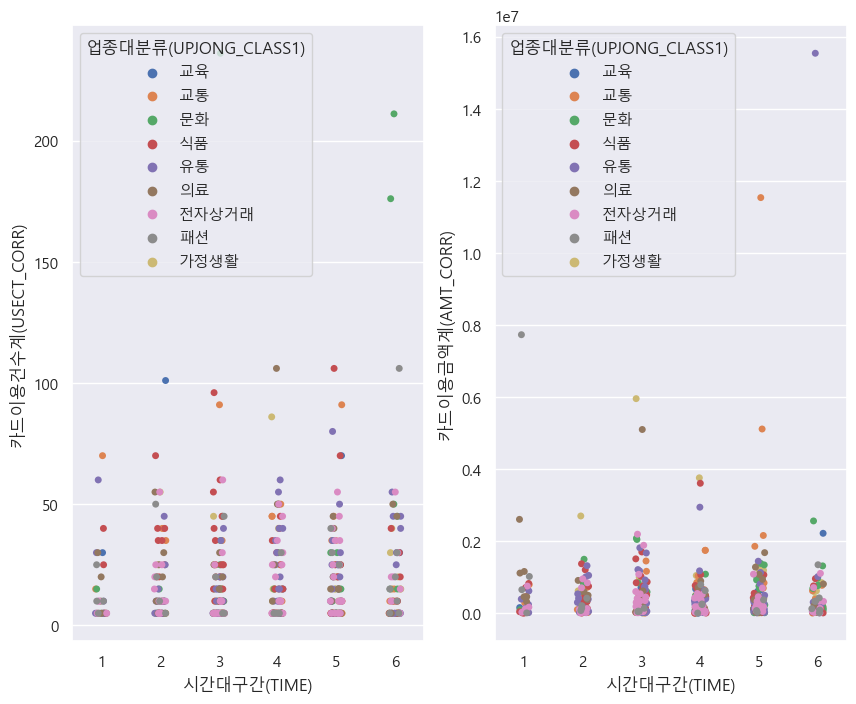

In [18]:
fig,axes =  plt.subplots(1,2,figsize = (10,8))

sns.stripplot(data=cdf3, x='시간대구간(TIME)', y="카드이용건수계(USECT_CORR)",ax = axes[0],hue='업종대분류(UPJONG_CLASS1)')
sns.stripplot(data=cdf3, x='시간대구간(TIME)', y='카드이용금액계(AMT_CORR)',ax = axes[1],hue='업종대분류(UPJONG_CLASS1)')
## 퇴근할때 시간에 여유가 있을 때 주로 주유를 하는 패턴/ 출근할때 여유도 없고 차도 막혀서 주유는 보통 x
## 전자상거래는 모든 시간구간에 비슷하게 분포함(건수, 금액 모두)

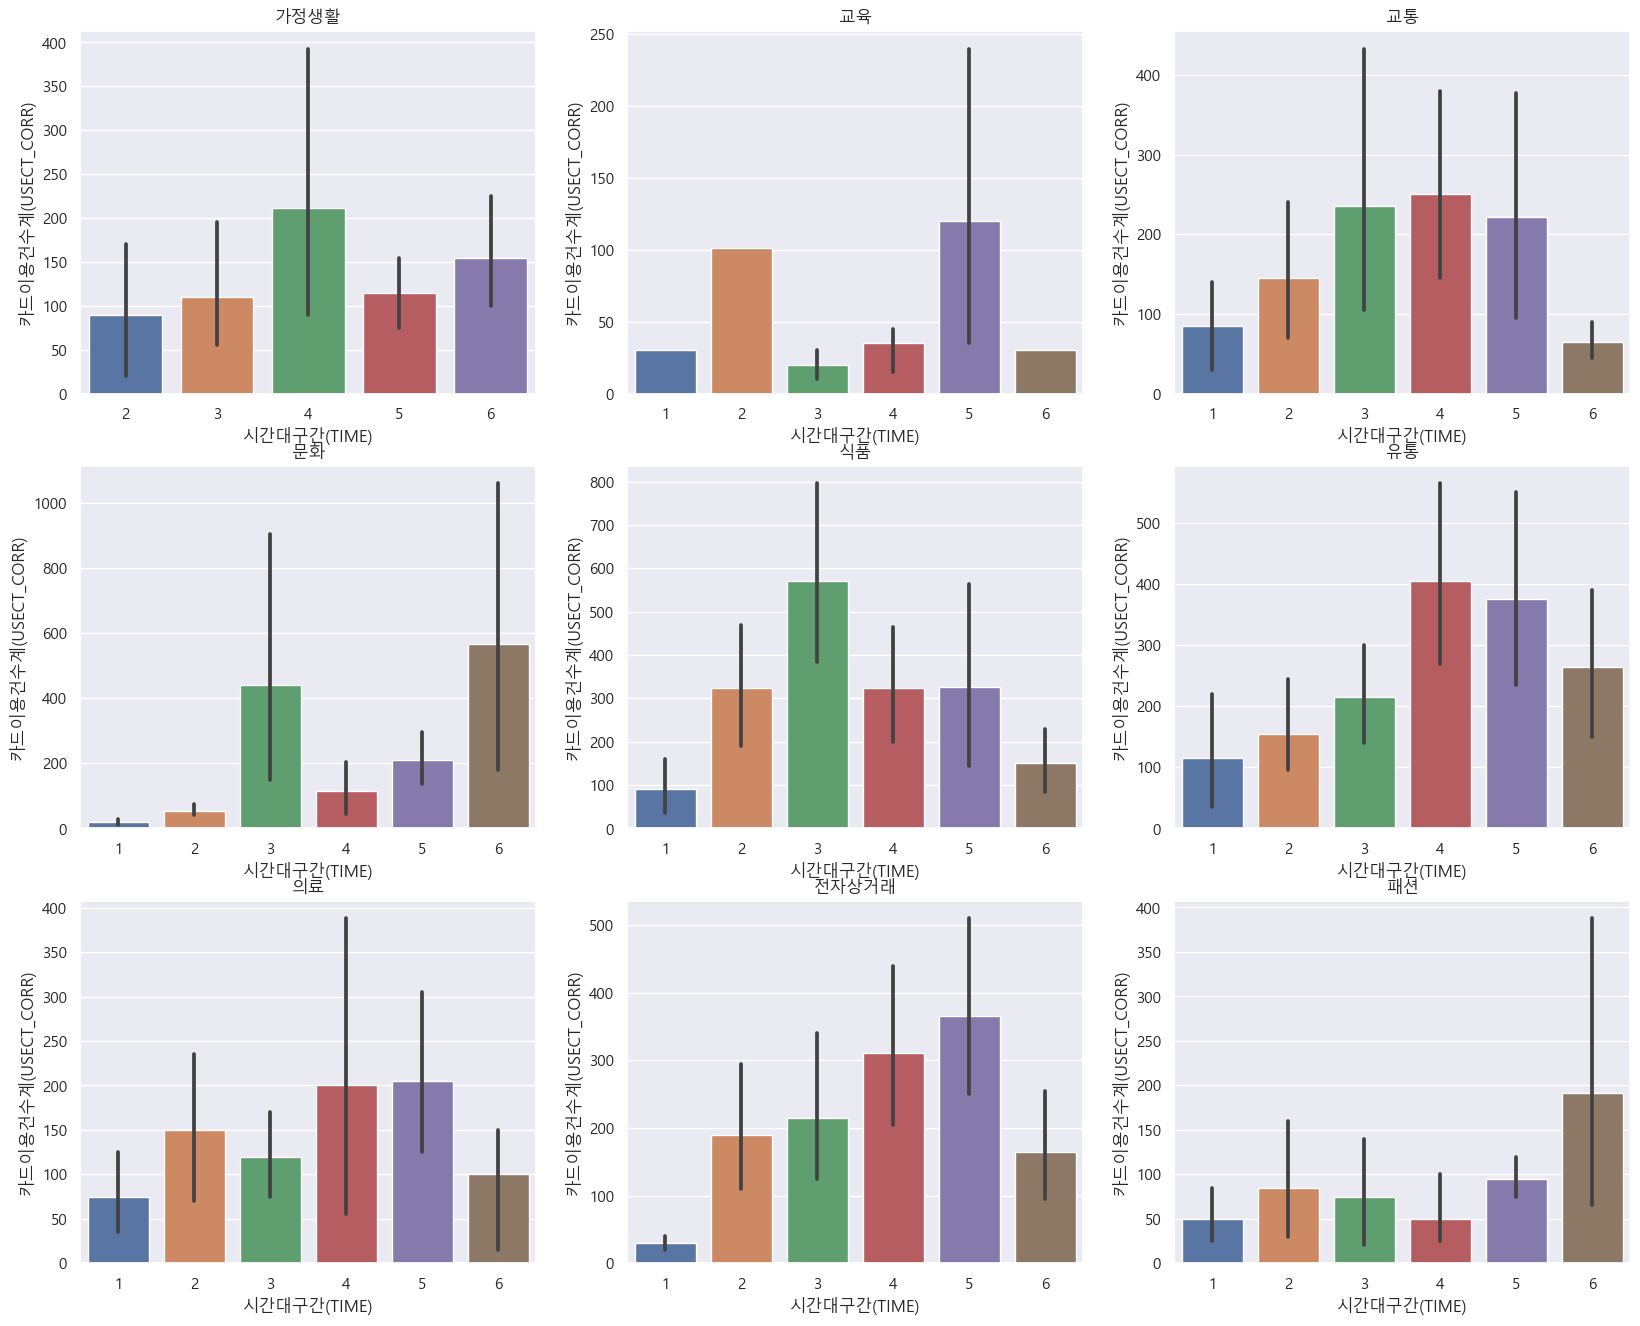

In [10]:
fig,axes =  plt.subplots(3,3,figsize = (20,16))

axes[0][0].set_title('가정생활')
sns.barplot(data = gadf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', estimator='sum',ax=axes[0][0])

axes[0][1].set_title('교육')
sns.barplot(data = eddf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)',estimator='sum', ax=axes[0][1])

axes[0][2].set_title('교통')
sns.barplot(data = trandf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', estimator='sum',ax=axes[0][2])

axes[1][0].set_title('문화')
sns.barplot(data = culdf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', estimator='sum',ax=axes[1][0])

axes[1][1].set_title('식품')
sns.barplot(data = fodf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', estimator='sum',ax=axes[1][1])

axes[1][2].set_title('유통')
sns.barplot(data = logisdf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', estimator='sum',ax=axes[1][2])

axes[2][0].set_title('의료')
sns.barplot(data = meddf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', estimator='sum',ax=axes[2][0])

axes[2][1].set_title('전자상거래')
sns.barplot(data = onlinedf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', estimator='sum',ax=axes[2][1])

axes[2][2].set_title('패션')
sns.barplot(data = fadf, x = '시간대구간(TIME)', y = '카드이용건수계(USECT_CORR)', estimator='sum',ax=axes[2][2])
plt.show()

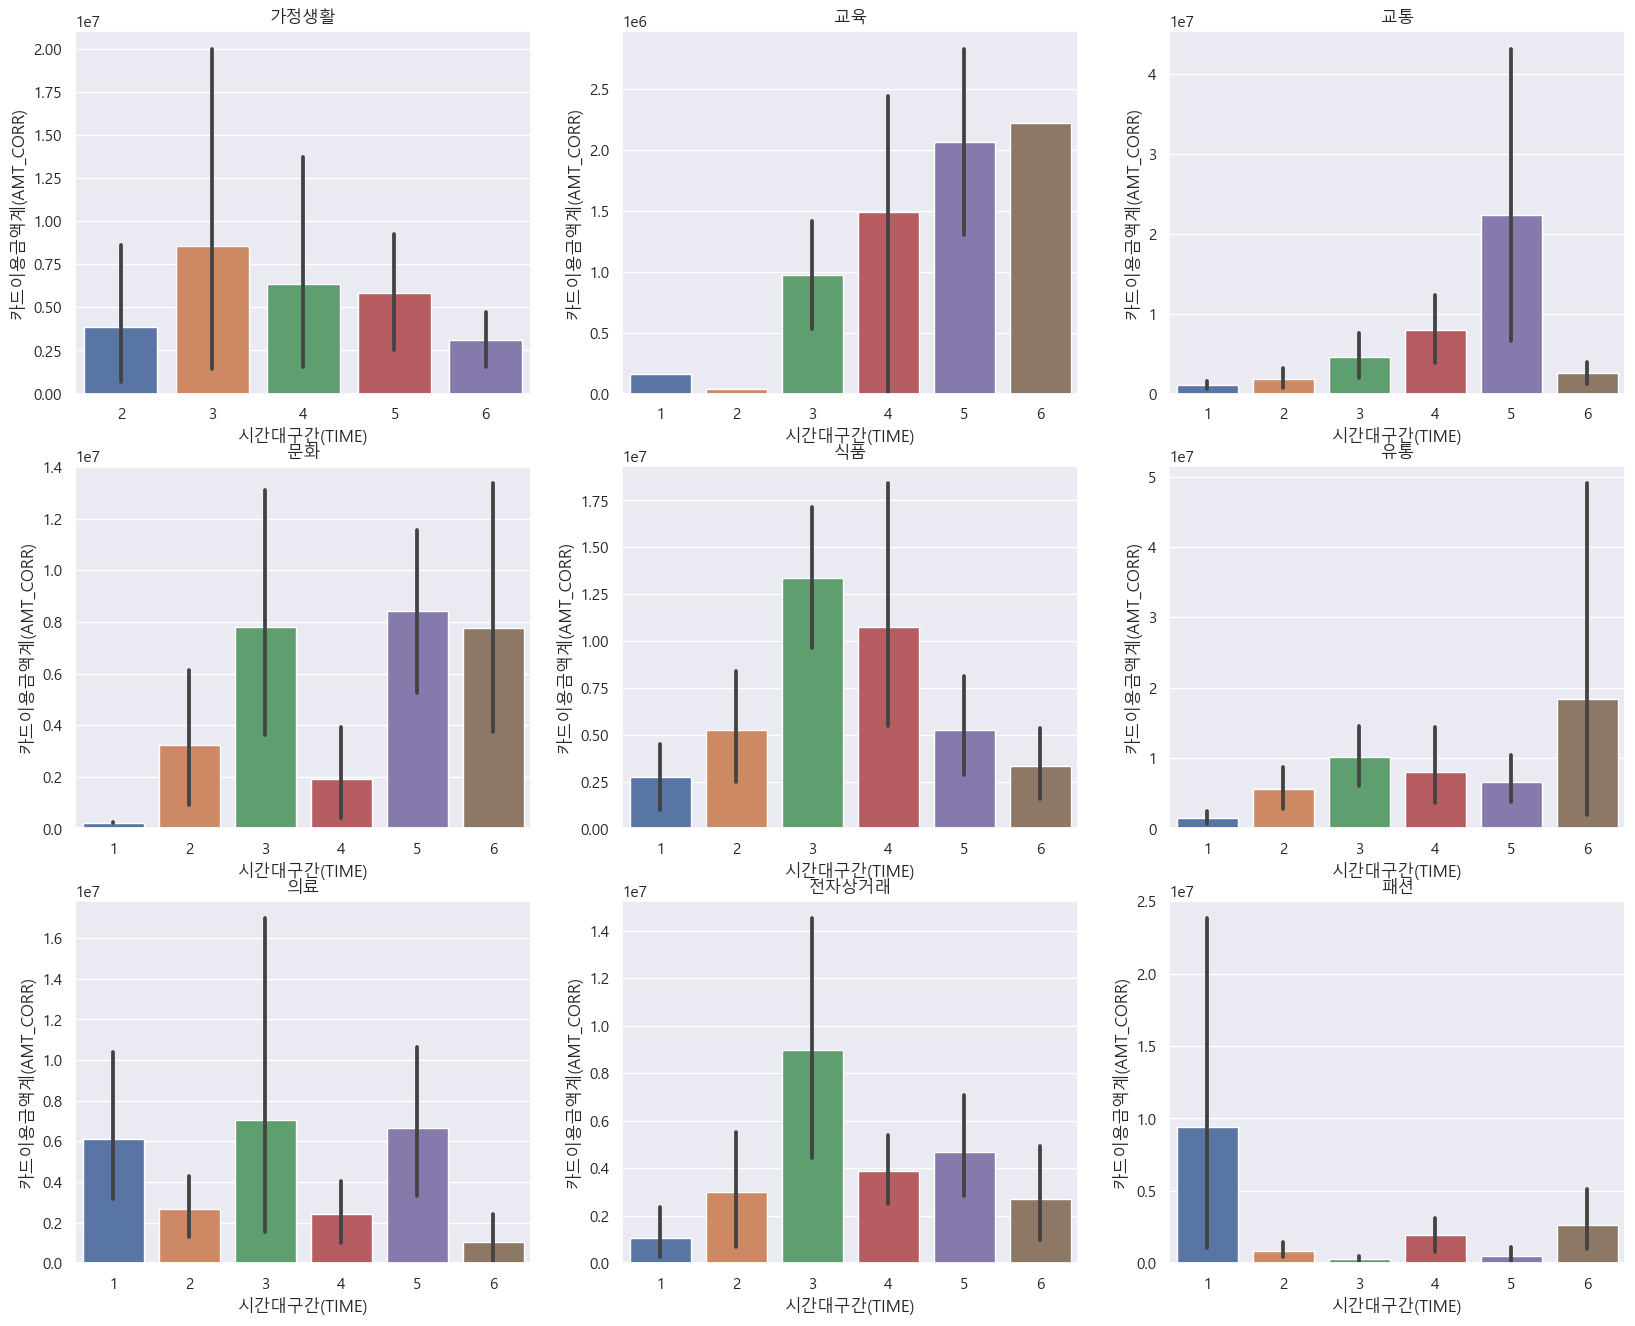

In [18]:
fig,axes =  plt.subplots(3,3,figsize = (20,16))

axes[0][0].set_title('가정생활')
sns.barplot(data = gadf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', estimator='sum',ax=axes[0][0])

axes[0][1].set_title('교육')
sns.barplot(data = eddf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', estimator='sum',ax=axes[0][1])

axes[0][2].set_title('교통')
sns.barplot(data = trandf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', estimator='sum',ax=axes[0][2])

axes[1][0].set_title('문화')
sns.barplot(data = culdf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', estimator='sum',ax=axes[1][0])

axes[1][1].set_title('식품')
sns.barplot(data = fodf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', estimator='sum',ax=axes[1][1])

axes[1][2].set_title('유통')
sns.barplot(data = logisdf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', estimator='sum',ax=axes[1][2])

axes[2][0].set_title('의료')
sns.barplot(data = meddf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)',estimator='sum', ax=axes[2][0])

axes[2][1].set_title('전자상거래')
sns.barplot(data = onlinedf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)', estimator='sum',ax=axes[2][1])

axes[2][2].set_title('패션')
sns.barplot(data = fadf, x = '시간대구간(TIME)', y = '카드이용금액계(AMT_CORR)',estimator='sum', ax=axes[2][2])
plt.show()
# 5구간에 교통 금액 늘어남, 퇴근시간에 주로 주유
# 식품은 새벽부터 증가하기 시작 중간에 최대, 감소


In [31]:
df3.groupby('업종대분류(UPJONG_CLASS1)')['카드이용건수계(USECT_CORR)'].sum().sort_values(ascending=False)
# 카드이용건수와 금애계는 관련x

업종대분류(UPJONG_CLASS1)
식품       1787
유통       1530
문화       1408
전자상거래    1275
교통       1002
의료        851
가정생활      681
패션        546
교육        336
Name: 카드이용건수계(USECT_CORR), dtype: int64

In [30]:
df3.groupby('업종대분류(UPJONG_CLASS1)')['카드이용금액계(AMT_CORR)'].sum().sort_values(ascending=False)
## 가장 돈을 많이 쓴 업종은 유통, 식품, 교통 >>> 생활에 필수적인 요소(삭품,교통)

업종대분류(UPJONG_CLASS1)
유통       50145497
식품       40713408
교통       40287475
문화       29431207
가정생활     27726880
의료       26004569
전자상거래    24313890
패션       15608844
교육        6949800
Name: 카드이용금액계(AMT_CORR), dtype: int64

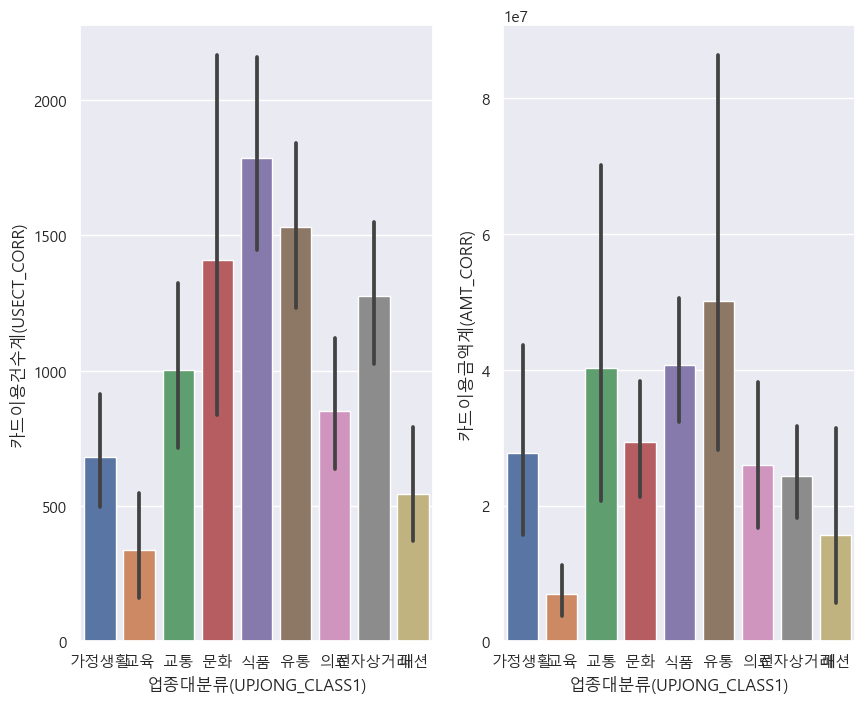

In [35]:
fig, axes = plt.subplots(1,2, figsize = (10,8))
sns.barplot(data = cdf3, x = '업종대분류(UPJONG_CLASS1)', y = '카드이용건수계(USECT_CORR)',estimator='sum', ax=axes[0])
sns.barplot(data = cdf3, x = '업종대분류(UPJONG_CLASS1)', y = '카드이용금액계(AMT_CORR)', estimator='sum',ax=axes[1])
plt.show()